# 1. Introduction
# Time Series - Auto Regression
Auto Regression is a time series model that uses observation from previous time steps as input to a regression equation to predict the value at the next time step. it is a very simple idea that can result in accurate forecasts on arange of time problems. The notation for the model involves specifying the order of the model p as a parameter to the AR function, e.g. AR(p). For example, AR(1) is a first-order autoregression model.


`yt=C+ϕ1yt−1+ϕ2Yt−2+...+ϕpyt−p+ϵtyt=C+ϕ1yt−1+ϕ2Yt−2+...+ϕpyt−p+ϵt`
 
- Where,`‘p’` is the auto-regressive trend parameter

The value of p can be calibrated using various methods. One way of finding the apt value of ‘p’ is plotting the `auto-correlation plot.`

- ϵtϵt is white noise, and

- yt−1,yt−2...yt−pyt−1,yt−2...yt−p denote the value of variable at previous time periods

`The method is suitable for univariate time series without trend and seasonal components`



# 2 Import the required package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.graphics.tsaplots import plot_acf
plt.rcParams["axes.grid"]=True
from statsmodels.graphics.tsaplots  import plot_acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\Users\pc\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


# 3. import the time series data
In this project, I will be using the us_retail dataset(Clothing column). The dataset consist of monthly records of sale across various retails sales in us, the data was download from kaggle site 

In [2]:
path="C:/Users/pc/Desktop/1/Data Science/Deep Learning/Time Series/comp/"
df = pd.read_csv(path + "us_retail_sales.csv")
df.head()

,Month,Clothing,Appliances,FoodAndBeverage,Automobiles,GeneralMerchandise,BuildingMaterials
0,1992-01,6938,3657,29589,26788,14996,8964
1,1992-02,7524,3490,28570,28203,16015,9023
2,1992-03,8475,3669,29682,31684,17984,10608
3,1992-04,9401,3527,30228,32547,18872,11630
4,1992-05,9558,3571,31677,32883,20037,12327


In [3]:
# extract the neede columns
df_Clothing= df[[ "Month","Clothing"]]
df_Clothing.head()

,Month,Clothing
0,1992-01,6938
1,1992-02,7524
2,1992-03,8475
3,1992-04,9401
4,1992-05,9558


In [4]:
# check the summary of the data
df_Clothing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     336 non-null    object
 1   Clothing  336 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


the month column is of object data type. First i will convert it to datetime and make it as index of the dataframe

In [9]:
df_Clothing.Month= pd.to_datetime(df_Clothing.Month, format="%Y-%m")

<ipython-input-9-8454fc72f256>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Clothing.Month= pd.to_datetime(df_Clothing.Month, format="%Y-%m")


In [10]:
df_Clothing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Month     336 non-null    datetime64[ns]
 1   Clothing  336 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.4 KB


In [11]:
# set the month column as index
df_Clothing.set_index("Month", inplace=True)

# 4. Time Series Analysis

# 4.1 Missing values

In [12]:
# check for missing values
df_Clothing.isna().sum()

Clothing    0
dtype: int64

# 4.2 Plot the time series dat

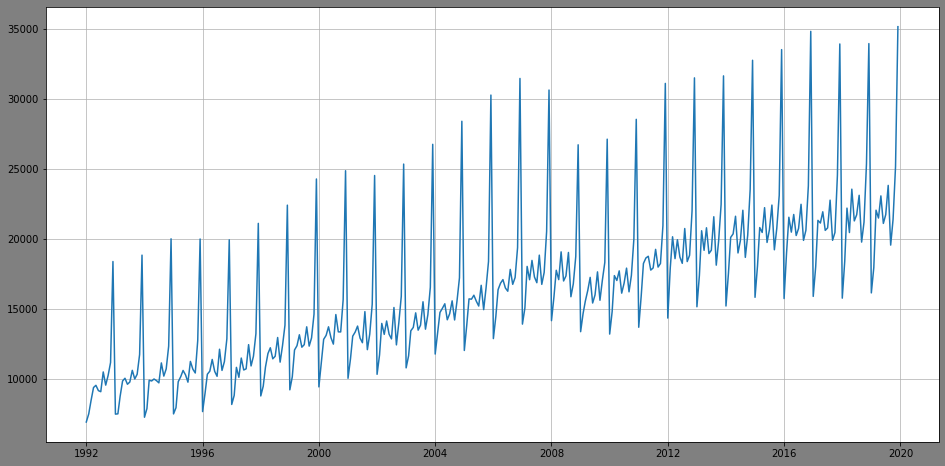

In [13]:
fig, ax = plt.subplots(figsize=(16, 8), facecolor=("grey"))
ax.grid(True, alpha=.9)
ax.plot(df_Clothing)

# 4.3  Time Series Decomposition
 

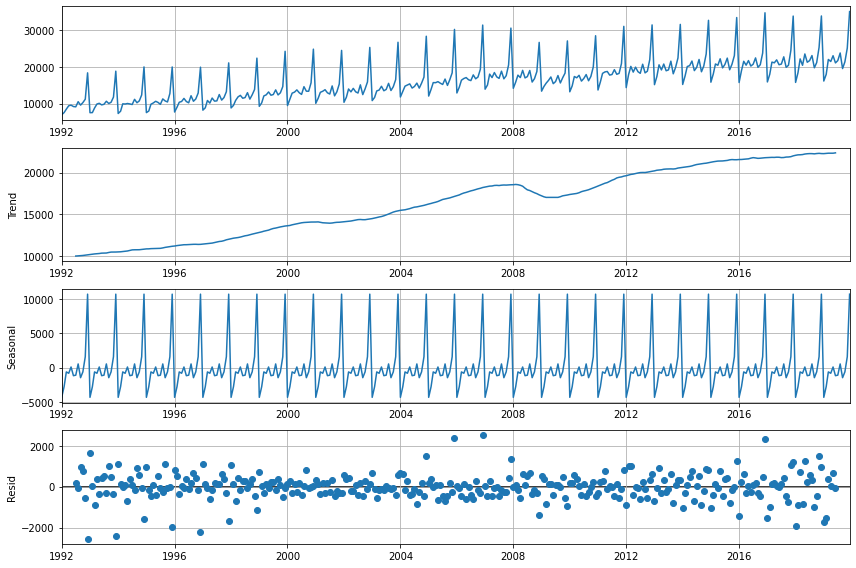

In [14]:
# additive decomposition
plt.rcParams["figure.figsize"]= (12,8)
from statsmodels.tsa.seasonal import seasonal_decompose
add_decompose = seasonal_decompose(df_Clothing, model="add")
fig= add_decompose.plot()
plt.show()

# 4.4 Plot the trend the dataset

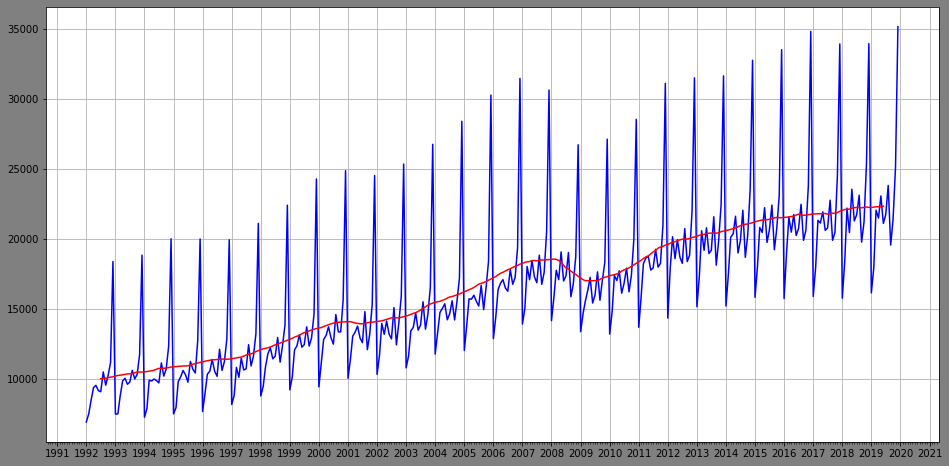

In [15]:
# plt.rcParams['figure.figsize']= (16, 8)

from matplotlib import dates as date
fig, ax = plt.subplots(figsize=(16,8), facecolor=("grey"))
ax.grid(True)


year= date.YearLocator(month=1)
month = date.MonthLocator()
yearformat = date.DateFormatter("%Y")
monthformat = date.DateFormatter("%m")

ax.xaxis.set_minor_locator(month)
ax.xaxis.grid(True)
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(yearformat)



plt.plot(df_Clothing.index, df_Clothing.values, c="blue")
plt.plot(add_decompose.trend.index, add_decompose.trend, c="red")

# 4.5 Plot the seasonal plot of the time series data

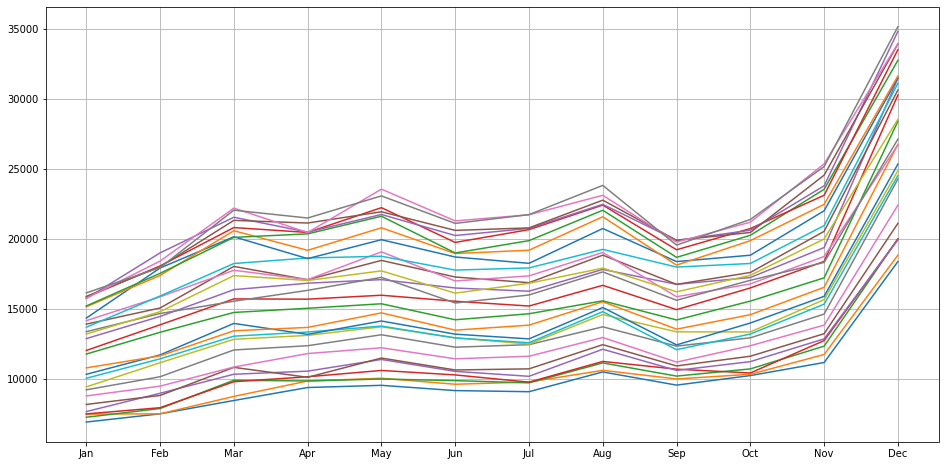

In [75]:
plt.figure(figsize=(16, 8))
plt.grid(True)
# Prepare data

df_seaoanl=df_Clothing.copy()
df_seaoanl['year'] = [d.year for d in df_seaoanl.index.date]
df_seaoanl['month'] = [d.strftime('%b') for d in df_seaoanl.index.date]
years = df_seaoanl['year'].unique()
#fig, ax = plt.subplots(figsize=(16,8), facecolor=("grey"))
#ax.facecolor=("grey")

# make the plot
for i, n in enumerate(years):
    if i>=0:
        plt.plot("month","Clothing" ,data=df_seaoanl[df_seaoanl["year"]==n])


The plot above depict the seasonality of the dataset. And it can be seen from the plot that there is always an increase of sales of Cloths from month of november  to month of december of every year recorded. This make sense as more people will tent to buy cloth for festival celebration

# 4.6. Check the  stationarity of the dataset


In [19]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(df_Clothing, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')



ADF Statistic: -0.7106728661321587
p-value: 0.8439656222468213
Critial Values:
   1%, -3.450886958636161
Critial Values:
   5%, -2.870586350823483
Critial Values:
   10%, -2.5715897843576827


the the p values is greater than 0.05 which implies that there is not stationarity in the dataset. Also since the auto regression model work well on the data without seasonality and trend, I will detrend and deseason the dataset

# Make the Series Stationary by rolling mean differencing

<AxesSubplot:xlabel='Month'>

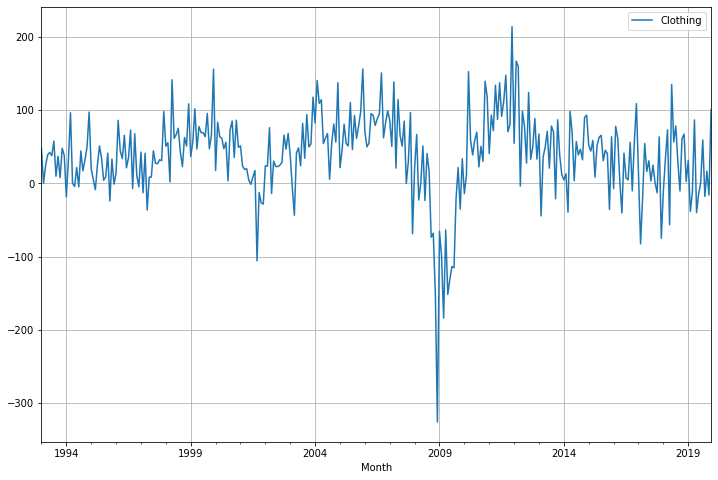

In [27]:
rolling_mean= df_Clothing["Clothing"].rolling(12).mean()
differening_df =pd.DataFrame( rolling_mean - rolling_mean.shift())
differening_df.dropna(inplace=True)
differening_df.plot()

In [28]:
#df_detrend = df_Clothing["Clothing"] - add_decompose.trend
#df_seasonal= df_detrend /  add_decompose.seasonal
#df_seasonal= df_seasonal.dropna()

#df_seasonal.plot()
#a=df_seasonal - df_seasonal.shift()
#df_stationary=a.dropna()

In [24]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(differening_df, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')



ADF Statistic: -3.729395015684764
p-value: 0.0037181798188214493
Critial Values:
   1%, -3.45176116018037
Critial Values:
   5%, -2.870970093607691
Critial Values:
   10%, -2.571794416006072


In [29]:
#df_stationary=df_stationary.to_frame(name="clothing")

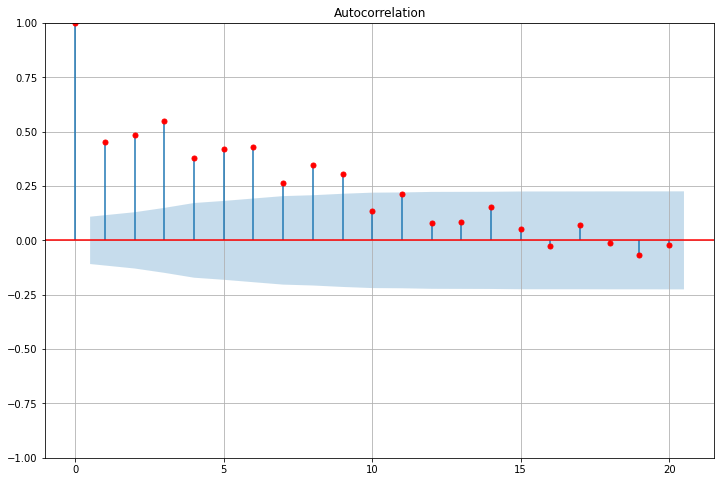

In [33]:
# plot the autocorrelation 
fig=plot_acf(differening_df, lags=20, color="red")

# 4.7 Carry granger Test

Granger Test is ues to check the forecasbility of the Time Serie using the p values

In [35]:
from statsmodels.tsa.stattools import grangercausalitytests
dd=df_Clothing.reset_index()
dd["record_period"]= pd.to_datetime(dd.Month).dt.month
grangercausalitytests(dd[["Clothing", 'record_period']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0045  , p=0.9466  , df_denom=332, df_num=1
ssr based chi2 test:   chi2=0.0045  , p=0.9463  , df=1
likelihood ratio test: chi2=0.0045  , p=0.9463  , df=1
parameter F test:         F=0.0045  , p=0.9466  , df_denom=332, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=56.3119 , p=0.0000  , df_denom=329, df_num=2
ssr based chi2 test:   chi2=114.3354, p=0.0000  , df=2
likelihood ratio test: chi2=98.3298 , p=0.0000  , df=2
parameter F test:         F=56.3119 , p=0.0000  , df_denom=329, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=40.9122 , p=0.0000  , df_denom=326, df_num=3
ssr based chi2 test:   chi2=125.3722, p=0.0000  , df=3
likelihood ratio test: chi2=106.4065, p=0.0000  , df=3
parameter F test:         F=40.9122 , p=0.0000  , df_denom=326, df_num=3


{1: ({'ssr_ftest': (0.004493809762638265, 0.946593487193495, 332.0, 1),
   'ssr_chi2test': (0.004534416477360899, 0.9463125654113873, 1),
   'lrtest': (0.004534385789156659, 0.9463127468112443, 1),
   'params_ftest': (0.004493809762753365, 0.9465934871928389, 332.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (56.311903976499956, 9.280952543400119e-22, 329.0, 2),
   'ssr_chi2test': (114.33541597660175, 1.4872359596296846e-25, 2),
   'lrtest': (98.32981899755669, 4.445812078436928e-22, 2),
   'params_ftest': (56.31190397649992, 9.280952543400346e-22, 329.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (40.91224082930808, 1.8253611245007599e-22, 326.0, 3),
   'ssr_chi2test': (125.37217358429072, 5.3733183547853354e-27, 3),
   'lrtest': (106.40647708572851, 6.509934289901089e-23, 3),
   'params_ftest': (40.91224082930814, 1.825361124500626e-22, 326.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0.

# 5 Built the model

# 5.1 Method 1 : Auto Regression

<AxesSubplot:xlabel='Month'>

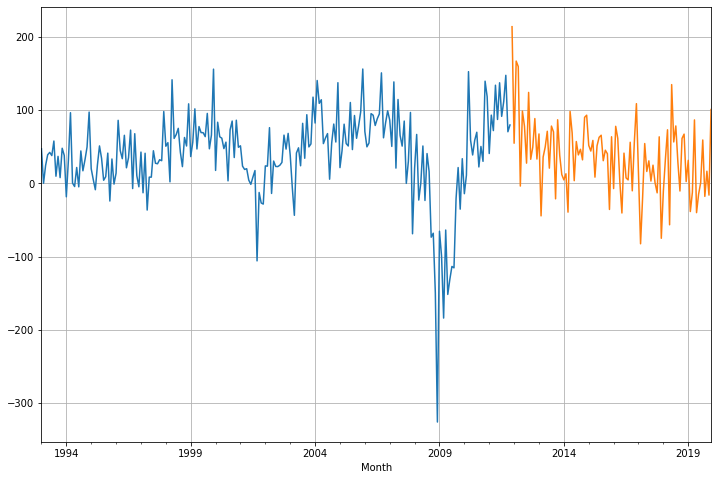

In [40]:
split = len(df_stationary) - int(len(df_stationary) * .3)

train = differening_df[["Clothing"]][:split].rename(columns={"Clothing": "clothing_train"})
test = differening_df[["Clothing"]][split:].rename(columns={"Clothing": "clothing_test"})
train.clothing_train.plot()
test.clothing_test.plot()

In [84]:
# AR example
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
from random import random

def AR_Model(train, test):
    model = AutoReg(train, lags=11)
    model_fit = model.fit()
    # make prediction
    yhat = model_fit.predict(start=pd.to_datetime(test.index[0]),
                             end=pd.to_datetime(test.index[-1]), dynamic=False)
    return pd.DataFrame(yhat, index=test.index, columns=test.columns)

C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:152: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and NumericIndex with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(


<AxesSubplot:xlabel='Month'>

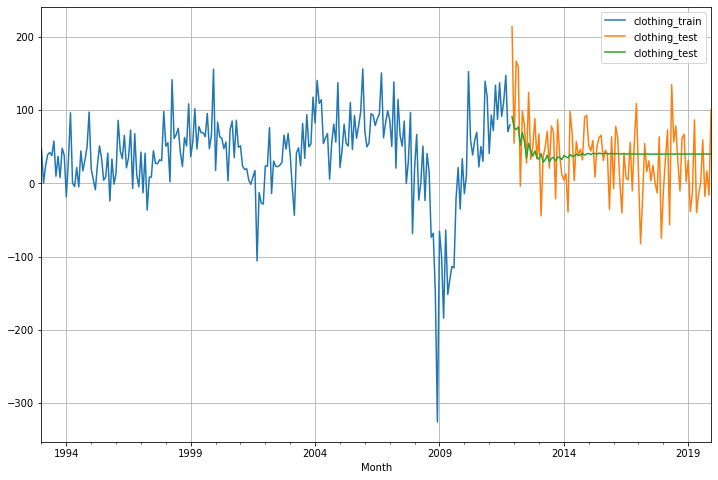

In [86]:
yhat=AR_Model(train, test)
train.clothing_train.plot(legend=True)
test.clothing_test.plot(legend=True)
yhat.clothing_test.plot(legend=True)
#plt.title("JKj")


# 6 Evaluate the method 1

In [87]:
naive_prediction_rmse = np.sqrt(mean_squared_error(test,yhat ))
naive_prediction_r2 = r2_score(test,yhat )

In [88]:
result= pd.DataFrame([{"Method": "Auto Regression", "RMSE":naive_prediction_rmse, "r2":naive_prediction_r2}])
result

,Method,RMSE,r2
0,Auto Regression,46.828287,0.139545


In [93]:
from sklearn.model_selection import ParameterGrid

param_grid_TES = {"lags":[1,2,3,4,5,6,7,8,9,10,11,12,13],  "trend" : ['n', 'c', 't', 'ct']}
pg_TES = list(ParameterGrid(param_grid_TES)) 
df_results_TES = pd.DataFrame(columns=['lags','trend','RMSE','R²'])

for a,b in enumerate(pg_TES):
    lags = b.get('lags')
    trend = b.get("trend")
    model = AutoReg(train, lags=lags, trend=trend)
    model_fit = model.fit()
    yhat = model_fit.predict(start=pd.to_datetime(test.index[0]),
                             end=pd.to_datetime(test.index[-1]), dynamic=False)
    yhat= pd.DataFrame(yhat, columns=test.columns)
    RMSE= np.sqrt(mean_squared_error(test, yhat))
    r2= r2_score(test, yhat)
    df_results_TES = df_results_TES.append({'lags':lags, "trend":trend, "RMSE":RMSE, "R²":r2 }, ignore_index=True)
    
df_results_TES.sort_values(by=['RMSE','R²']).head(10) 


C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:152: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and NumericIndex with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(
<ipython-input-93-760175a375e1>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_TES = df_results_TES.append({'lags':lags, "trend":trend, "RMSE":RMSE, "R²":r2 }, ignore_index=True)
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('N

<ipython-input-93-760175a375e1>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_TES = df_results_TES.append({'lags':lags, "trend":trend, "RMSE":RMSE, "R²":r2 }, ignore_index=True)
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:152: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and NumericIndex with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(
<ipython-input-93-760175a375e1>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_TES = d

C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:152: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and NumericIndex with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(
<ipython-input-93-760175a375e1>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_TES = df_results_TES.append({'lags':lags, "trend":trend, "RMSE":RMSE, "R²":r2 }, ignore_index=True)
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('N

C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:152: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and NumericIndex with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(
<ipython-input-93-760175a375e1>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_TES = df_results_TES.append({'lags':lags, "trend":trend, "RMSE":RMSE, "R²":r2 }, ignore_index=True)
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:152: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and NumericIndex with a u

,lags,trend,RMSE,R²
51,13,ct,46.50932,0.151227
39,10,ct,46.767257,0.141786
41,11,c,46.828287,0.139545
37,10,c,46.933282,0.135682
25,7,c,46.934794,0.135626
45,12,c,46.998681,0.133272
47,12,ct,47.082106,0.130192
49,13,c,47.102255,0.129447
20,6,n,47.15279,0.127578
29,8,c,47.169807,0.126949


13

In [107]:
param_grid_TES = {"lags":[1,2,3,4,5,6,7,8,9,10,11,12,13],  "trend" : ['n', 'c', 't', 'ct']}
pg_TES = list(ParameterGrid(param_grid_TES)) 
df_results_TES = pd.DataFrame(columns=['lags','trend','RMSE','R²'])

for a,b in enumerate(pg_TES):
    lags = b.get('lags')
    trend = b.get("trend")
    model = AutoReg(train, lags=lags, trend=trend)
    model_fit = model.fit()
    yhat = model_fit.predict(start=pd.to_datetime(test.index[0]),
                             end=pd.to_datetime(test.index[-1]), dynamic=False)
    yhat= pd.DataFrame(yhat, columns=test.columns)
    RMSE= np.sqrt(mean_squared_error(test, yhat))
    r2= r2_score(test, yhat)
    df_results_TES = {'lags':lags, "trend":trend, "RMSE":RMSE, "R²":r2 }
    df_results_TES=pd.DataFrame(df_results_TES, index=[a])    
    df_results_TES

C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:152: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and NumericIndex with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:152: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and NumericIndex with a unit increment support extending. The index is set will contain t

C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:152: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and NumericIndex with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:152: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and NumericIndex with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS wil

C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:152: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and NumericIndex with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:152: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and NumericIndex with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS wil

C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:152: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and NumericIndex with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(


In [102]:
pd.DataFrame(df_results_TES, index=list(b))

,lags,trend,RMSE,R²
0,13,ct,46.50932,0.151227


# Reference

1. kaggle.com
2. tutorialpoint.com